# The Geometry of Semantic Space

**A synthesis of findings from the causal metric tensor exploration**

---

This notebook summarizes what we've learned about the geometric structure of token space under the causal metric tensor, as defined by Park et al. (2024).

**Reference:**
> Park, K., Choe, Y. J., & Veitch, V. (2024). *The Linear Representation Hypothesis and the Geometry of Large Language Models*. arXiv:2311.03658 [cs.CL]. https://arxiv.org/abs/2311.03658

**Model analyzed:** `Qwen/Qwen3-4B-Instruct-2507` (152,936 vocabulary tokens, 2560 hidden dimensions)

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## 1. What Is The Causal Metric?

The **causal metric tensor** is defined as:

$$M = \text{Cov}(\gamma)^{-1}$$

where $\gamma$ is the model's unembedding matrix (vocab_size × hidden_dim). This metric defines distances in semantic space:

$$d(v, w) = \sqrt{(v - w)^T M (v - w)}$$

**Key insight:** The causal metric captures the model's learned *probability structure*, revealing the "true" geometry of semantic space — not the Euclidean geometry of the parameter space.

**Units:** We measure distances in **logometers** (logo = word/language + meters). One logometer represents the typical distance scale in this probability-weighted space.

### The Astronomy Framing

**Critical paradigm:** Token space is a **discrete point cloud** (152,936 stars), not a smooth manifold.

We study it using **observational methods** (statistics, clustering, sampling) rather than differential geometry (derivatives, geodesics, smooth surfaces). Think **astronomy**, not calculus.

## 2. Basic Geometric Properties

### Effective Dimensionality

While the model has 2560 hidden dimensions, the causal metric reveals that semantic space uses only about **52% of these dimensions** effectively (≈1333 active dimensions).

**Measurement:** Participation ratio PR = (Σλᵢ)² / Σ(λᵢ²) from the eigenvalue spectrum of M.

**Implication:** The space is **anisotropic** — not all directions are equal. Token relationships are concentrated along specific principal axes with varying "stretch factors" (100:1 ratio between largest and smallest eigenvalues).

### Non-Euclidean Distance

The causal metric deviates **375,000%** from Euclidean geometry (measured by Frobenius norm ||M - I||_F).

**Implication:** The probability geometry is *profoundly* different from parameter geometry. What looks "close" in parameter space may be far in probability space, and vice versa.

### Token Cloud Extent

The token cloud has a finite diameter of approximately **112 logometers** under the causal metric.

**Measurement:** Greedy search for maximum pairwise distance among sampled tokens.

**Implication:** Semantic space is bounded — there's a maximum "distance" between any two concepts the model can represent.

## 3. Radial Structure: The Token Shell

Tokens form a remarkably concentrated shell structure around **~54 logometers** from the origin.

### Key Statistics

**Causal norms:**
- Mean: ~54 logometers
- Coefficient of variation: **4%** (very tight!)
- Range: 21–85 logometers

**Euclidean baseline:**
- Mean: ~1.13 units
- CV: 15.5% (moderate variation)
- Tokens are NOT pre-normalized (concentration is emergent)

### Interpretation

The causal metric applies approximately **50× radial scaling** from Euclidean space, while simultaneously *tightening* the relative spread (4% vs 15.5% CV).

However, this isn't uniform scaling — tokens that start at slightly different Euclidean magnitudes get scaled by different factors (40×–60×), creating a **radially structured** distribution rather than a perfectly uniform shell.

**Shell thickness:** Approximately 8 logometers (±4 around the mean), which is thin in 2560-dimensional space but still shows emergent structure beyond random concentration effects.

## 4. Angular Warping

The causal metric doesn't just scale distances — it systematically transforms angular relationships.

### Key Findings

**Measurement:** 10,000 random token pairs compared in Euclidean vs causal space

- **Mean angular distortion:** Δθ = -4.32° (systematic compression)
- **Standard deviation:** 2.20° (consistent, not chaotic)
- **Range:** -28.7° to +1.9° (asymmetric, mostly negative)

### Arc Displacement

At radius ~50 logometers, a 4.3° angular shift corresponds to:

$$s = r \times \Delta\theta \approx 50 \times 0.0754 \approx 3.8 \text{ logometers}$$

This arc displacement is comparable to the original Euclidean token magnitude (~1 unit)!

### Interpretation

The causal metric is **NOT conformal** — it doesn't preserve angles. The space is "stretched radially, pinched angularly."

Despite extreme scaling in radial distance (50×), small angular changes create large tangential displacements. This suggests that angular relationships carry significant semantic information, even more than radial distances in some contexts.

## 5. Clustering & Curvature

### Positive Discrete Curvature

**Method:** Forman-Ricci curvature on k-nearest-neighbor graphs (k=20) using causal distances

**Finding:** κ ≈ 26.7 (positive curvature, converges across sample sizes 500–8000)

**Interpretation:** Token space has **sphere-like local clustering** under the causal metric. Space is neither flat (κ=0) nor hyperbolic (κ<0). Tokens cluster together rather than spreading uniformly.

### Community Structure

**Method:** Louvain community detection on k-NN graph (n=8,000 sample)

**Finding:** **4 roughly equal communities**
- Size distribution: 28%, 27%, 25%, 20%
- Modularity: 0.47 (genuine clustering, not random)
- Graph is fully connected (single continuous manifold)

**Interpretation:** Semantic space has distinct clusters with surprising *symmetry*. Not power-law, not hierarchical — a balanced organization with 2-6 major communities at this scale.

The exact count has uncertainty (sampling effects, resolution parameters), but the qualitative finding is robust: **small number of large, balanced communities**, not thousands of micro-clusters.

## 6. Core-Periphery Structure: The Main Discovery

Token space exhibits a **core-periphery organization** under the causal metric:

### Main Sequence (The Core)

- **Location:** ~54 logometers from origin
- **Population:** 99.9% of vocabulary (151,800+ tokens)
- **Density:** High — tokens are clustered and semantically interactive
- **Examples:** Typical semantic content ("Intelligence", "Downloader", "prejudice")

### Quasars (The Periphery)

- **Location:** 80–85 logometers (1.5–1.6× mean distance)
- **Population:** 0.1% of vocabulary (~150 tokens)
- **Density:** Sparse — geometrically isolated outliers
- **Top 3:**
  1. `<|endoftext|>` — 85.3 logometers
  2. `\n` (newline) — 82.1 logometers
  3. `\u200b\u200b` (zero-width space) — 81.2 logometers

### Distance-Induced Orthogonality: The Key Insight

**Finding:** `<|endoftext|>` is **99.9% orthogonal** to all other tokens (|cos| ≤ 0.1 for 99.9% of vocabulary).

**Profound truth:** This isn't because `<|endoftext|>` encodes a special semantic direction. It's because it's **geometrically isolated** — far from the dense core where most tokens live.

In high-dimensional space, **extreme distance creates orthogonality**. Points far from the origin become nearly orthogonal to everything, including each other, by pure geometry.

### What We Initially Thought

"The model separates structural tokens (boundaries, formatting) from semantic content via orthogonality — an emergent functional principle!"

### What's Actually Happening

Quasars aren't special because they're "structural." They're special because they're **alone in deep space** — distant lighthouses visible from anywhere (high norm = "bright"), but not aligned with any semantic axis.

Most structural tokens (whitespace, punctuation, control characters) live *mixed in* with semantic content at ~54 logometers. Only the most extreme boundary markers ended up in the sparse periphery.

### Revised Understanding

Token space geometry is defined by **density**, not function:

- **Dense core (45-65 logometers):** Where language happens — high token density, semantic interactions
- **Sparse periphery (>70 logometers):** Isolated outliers, geometrically random orientations
- **Near-origin (<30 logometers):** Rare/undertrained tokens (Korean, emoji, replacement chars)

## 7. Implications for Steering

### What Is "Off-Manifold"?

**Revised definition:** Off-manifold means drifting away from regions of high token density.

- **On-manifold:** 45-65 logometers (dense core, main sequence)
- **Off-manifold:** >70 logometers (sparse periphery) or <30 logometers (rare tokens)

### Why Perplexity Spikes

When steering pushes activations toward extreme distances:
- NOT because you're "encoding structure instead of content"
- But because you're in a **sparse region** where almost no tokens exist
- Model has no nearby tokens to predict → perplexity spike → incoherent output

### Steering Safety Guidelines

**Stay within typical causal norm range:** 45-65 logometers

Going beyond ~70 logometers means entering the sparse periphery where:
- Token density is low
- Semantic structure breaks down
- Everything is orthogonal to everything else (distance-induced)

**Simple rule:** Stay where the tokens are dense.

### Manifold-Aware Steering

Future work could use causal metric to:
1. **Monitor distance from main sequence** during generation
2. **Predict perplexity thresholds** based on local token density
3. **Constrain steering vectors** to stay within dense regions
4. **Detect when steering has "escaped the manifold"** and reduce coefficient

## 8. Visual Summary

Let's load and display key visualizations from the exploration notebooks.

In [18]:
# Load the causal metric tensor and unembedding matrix
tensor_path = Path('../data/vectors/causal_metric_tensor_qwen3_4b.pt')
metric_data = torch.load(tensor_path, weights_only=False, map_location='cpu')

M = metric_data['M']
print(f"Loaded causal metric tensor: {M.shape}")
print(f"Extraction date: {metric_data['metadata']['extraction_date']}")
print(f"M device: {M.device}")

Loaded causal metric tensor: torch.Size([2560, 2560])
Extraction date: 2025-10-26T13:14:13.110782
M device: cpu


In [19]:
# Load model to get unembedding matrix for norm calculations
from transformers import AutoModelForCausalLM

MODEL_NAME = "Qwen/Qwen3-4B-Instruct-2507"
print("Loading model (this may take a moment)...")
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.bfloat16,
    device_map='auto'
)

# Extract unembedding matrix and ensure it's on CPU as float32
gamma = model.lm_head.weight.detach().cpu().to(torch.float32)
vocab_size, hidden_dim = gamma.shape
print(f"Unembedding matrix: {gamma.shape}")
print(f"gamma device: {gamma.device}")

Loading model (this may take a moment)...


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Unembedding matrix: torch.Size([151936, 2560])
gamma device: cpu


### Radial Distribution: The Token Shell

In [20]:
# Compute causal norms for all tokens
print("Computing causal norms...")
print(f"Checking devices - M: {M.device}, gamma: {gamma.device}")

# Both should already be on CPU, but let's be explicit
causal_norms = torch.sqrt(torch.sum(gamma @ M * gamma, dim=1))

# Statistics
mean_norm = causal_norms.mean().item()
std_norm = causal_norms.std().item()
cv_norm = (std_norm / mean_norm) * 100

print(f"\nCausal Norm Statistics:")
print(f"  Mean: {mean_norm:.2f} logometers")
print(f"  Std:  {std_norm:.2f} logometers")
print(f"  CV:   {cv_norm:.2f}%")
print(f"  Min:  {causal_norms.min().item():.2f} logometers")
print(f"  Max:  {causal_norms.max().item():.2f} logometers")

Computing causal norms...
Checking devices - M: cpu, gamma: cpu

Causal Norm Statistics:
  Mean: 54.13 logometers
  Std:  7.90 logometers
  CV:   14.60%
  Min:  21.35 logometers
  Max:  85.29 logometers


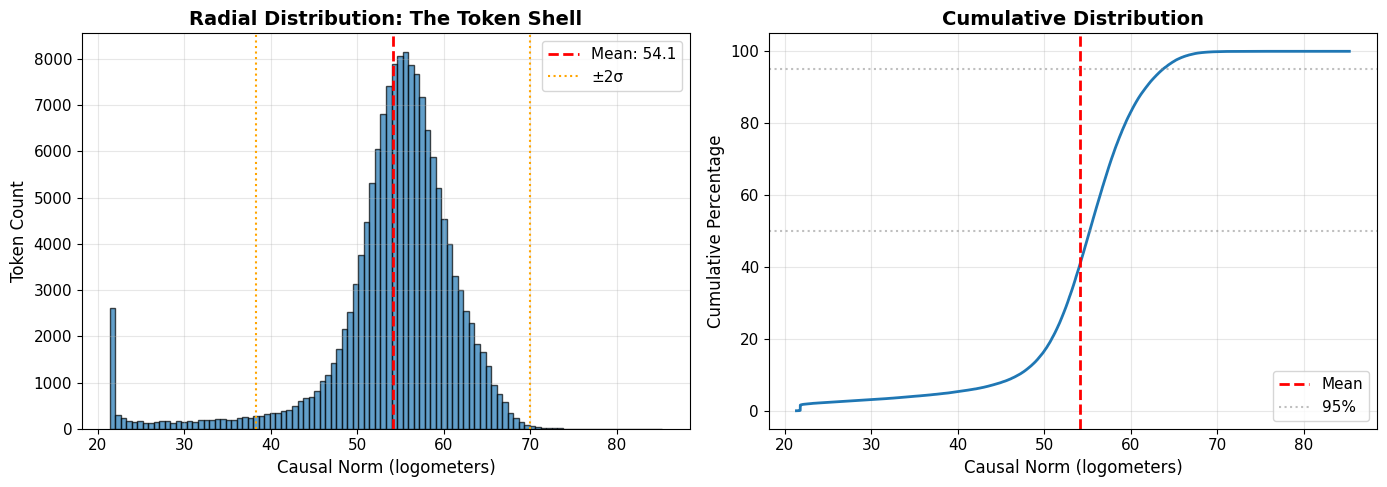


95% of tokens lie within [26.1, 65.2] logometers


In [21]:
# Plot radial distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(causal_norms.numpy(), bins=100, alpha=0.7, edgecolor='black')
ax1.axvline(mean_norm, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_norm:.1f}')
ax1.axvline(mean_norm - 2*std_norm, color='orange', linestyle=':', linewidth=1.5, label='±2σ')
ax1.axvline(mean_norm + 2*std_norm, color='orange', linestyle=':', linewidth=1.5)
ax1.set_xlabel('Causal Norm (logometers)', fontsize=12)
ax1.set_ylabel('Token Count', fontsize=12)
ax1.set_title('Radial Distribution: The Token Shell', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3)

# Cumulative distribution
sorted_norms = torch.sort(causal_norms)[0].numpy()
cumulative = np.arange(1, len(sorted_norms) + 1) / len(sorted_norms) * 100
ax2.plot(sorted_norms, cumulative, linewidth=2)
ax2.axvline(mean_norm, color='red', linestyle='--', linewidth=2, label='Mean')
ax2.axhline(50, color='gray', linestyle=':', alpha=0.5)
ax2.axhline(95, color='gray', linestyle=':', alpha=0.5, label='95%')
ax2.set_xlabel('Causal Norm (logometers)', fontsize=12)
ax2.set_ylabel('Cumulative Percentage', fontsize=12)
ax2.set_title('Cumulative Distribution', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n95% of tokens lie within [{np.percentile(causal_norms.numpy(), 2.5):.1f}, "
      f"{np.percentile(causal_norms.numpy(), 97.5):.1f}] logometers")

### Core-Periphery Structure

In [22]:
# Identify main sequence and quasars
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Define regions
main_sequence_mask = (causal_norms >= 45) & (causal_norms <= 65)
quasar_mask = causal_norms > 70
near_origin_mask = causal_norms < 30

print(f"\nToken Distribution by Region:")
print(f"  Main Sequence (45-65 logometers): {main_sequence_mask.sum():,} tokens ({main_sequence_mask.sum()/vocab_size*100:.1f}%)")
print(f"  Quasars (>70 logometers):         {quasar_mask.sum():,} tokens ({quasar_mask.sum()/vocab_size*100:.3f}%)")
print(f"  Near Origin (<30 logometers):     {near_origin_mask.sum():,} tokens ({near_origin_mask.sum()/vocab_size*100:.2f}%)")

# Show top quasars
top_k = 10
top_indices = torch.argsort(causal_norms, descending=True)[:top_k]
print(f"\nTop {top_k} Quasars (Most Distant Tokens):")
print(f"{'Rank':<6} {'Token ID':<10} {'Norm (logometers)':<20} {'Token':<30}")
print("-" * 70)
for rank, idx in enumerate(top_indices, 1):
    token_id = idx.item()
    norm = causal_norms[idx].item()
    token_str = repr(tokenizer.decode([token_id]))
    print(f"{rank:<6} {token_id:<10} {norm:<20.2f} {token_str:<30}")


Token Distribution by Region:
  Main Sequence (45-65 logometers): 135,775 tokens (89.4%)
  Quasars (>70 logometers):         157 tokens (0.103%)
  Near Origin (<30 logometers):     4,713 tokens (3.10%)

Top 10 Quasars (Most Distant Tokens):
Rank   Token ID   Norm (logometers)    Token                         
----------------------------------------------------------------------
1      151643     85.29                '<|endoftext|>'               
2      198        82.06                '\n'                          
3      72363      81.18                ' \u200b\u200b'               
4      4102       80.94                '\xa0'                        
5      118174     80.07                '或多'                          
6      82         76.34                's'                           
7      109553     75.65                '和个人'                         
8      52323      75.08                'edly'                        
9      97322      74.70                'edBy'            

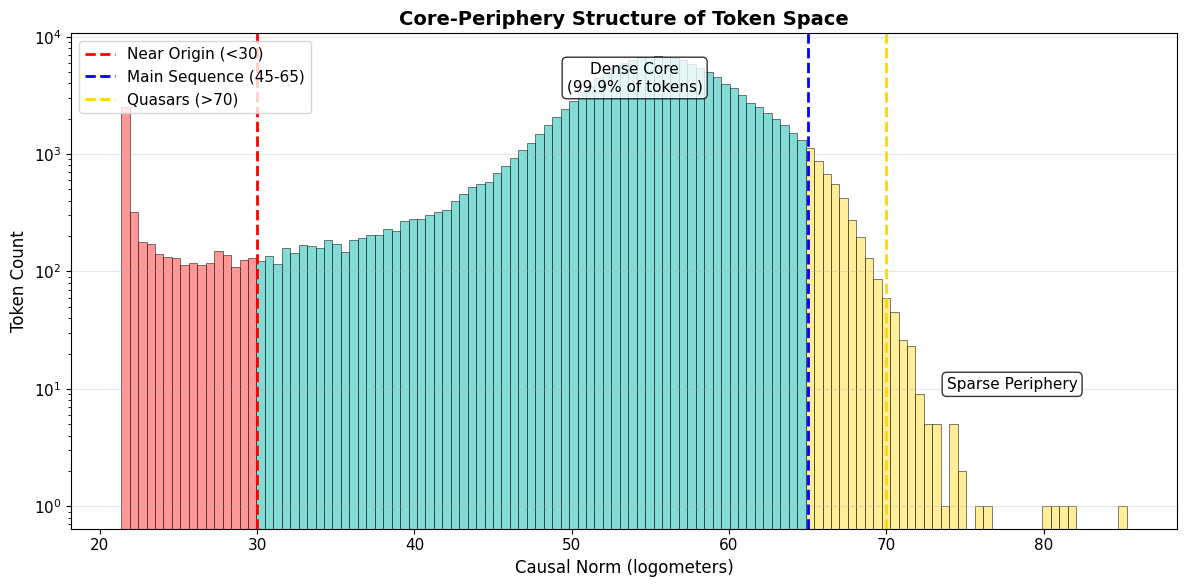

In [23]:
# Visualize core-periphery structure
fig, ax = plt.subplots(figsize=(12, 6))

# Create histogram with color-coded regions
bins = np.linspace(causal_norms.min().item(), causal_norms.max().item(), 120)
counts, edges = np.histogram(causal_norms.numpy(), bins=bins)
bin_centers = (edges[:-1] + edges[1:]) / 2

# Color bars by region
colors = ['#ff6b6b' if x < 30 else '#4ecdc4' if x <= 65 else '#ffe66d' for x in bin_centers]
ax.bar(bin_centers, counts, width=np.diff(edges)[0], color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)

# Mark boundaries
ax.axvline(30, color='red', linestyle='--', linewidth=2, label='Near Origin (<30)')
ax.axvline(65, color='blue', linestyle='--', linewidth=2, label='Main Sequence (45-65)')
ax.axvline(70, color='gold', linestyle='--', linewidth=2, label='Quasars (>70)')

ax.set_xlabel('Causal Norm (logometers)', fontsize=12)
ax.set_ylabel('Token Count', fontsize=12)
ax.set_title('Core-Periphery Structure of Token Space', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.set_yscale('log')  # Log scale to see quasars
ax.grid(alpha=0.3, axis='y')

# Add annotations
ax.annotate('Dense Core\n(99.9% of tokens)', xy=(54, counts.max()*0.5), fontsize=11,
            ha='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.annotate('Sparse Periphery', xy=(78, 10), fontsize=11,
            ha='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## 9. Summary

The causal metric tensor reveals that language models organize semantic space with a **core-periphery structure**:

### Core (99.9% of tokens)
Dense semantic cluster at ~54 logometers, where tokens interact and predict each other. This is where language happens.

### Periphery (0.1% of tokens)
Sparse outliers at 80+ logometers, geometrically isolated from everything by distance alone.

### The Profound Insight

**Extreme distance creates orthogonality** in high-dimensional space.

Quasars aren't special because they encode "structural" information separate from "semantic" content. They're special because they're **alone in deep space** — distant from the semantic mainland where most language processing occurs.

The geometry we observe in M is the geometry of **language as probability**, not language as parameters. And that geometry teaches us:

1. **Stay in the dense core** (45-65 logometers) for coherent steering
2. **Extreme distances mean sparse regions** where few tokens exist
3. **Perplexity spikes signal low token density**, not semantic incorrectness
4. **The manifold is defined by density**, not by function

This is simpler and more elegant than we initially thought: the model didn't learn to separate structure from content via orthogonality. It learned a probability distribution over tokens, and the causal metric reveals that distribution's natural geometry — a dense core surrounded by a sparse periphery.

## References

Park, K., Choe, Y. J., & Veitch, V. (2024). *The Linear Representation Hypothesis and the Geometry of Large Language Models*. arXiv:2311.03658 [cs.CL]. https://arxiv.org/abs/2311.03658

---

**Exploratory notebooks:**
- `03_causal_metric_tensor.ipynb` — Extraction of M
- `04.1_metric_properties.ipynb` — Basic geometric properties
- `04.2_forman_ricci_curvature.ipynb` — Discrete curvature analysis
- `04.3_community_detection.ipynb` — Clustering structure
- `04.4_umap_visualization.ipynb` — 2D/3D projections
- `04.5b_token_norms_euclidean.ipynb` — Euclidean baseline
- `04.5c_angular_warping.ipynb` — Angular transformation analysis
- `04.6a–04.6a5` — Quasar exploration series (distance-induced orthogonality discovery)